In [1]:

import torch
import matplotlib.pyplot as plt
from notebook_setup import device
import numpy as np
# change device to whatever you want to use
device = torch.device('cuda:0')
%load_ext autoreload
%autoreload 2

torch.manual_seed(0)

# Prepare Dataset

Take the ASCAT satellite dataset

In [2]:
%autoreload 2
from data.climate.eumetsat import EumstatDataset, ASCATDataset, HIRSDataset
from datetime import datetime

# dset = ASCATDataset(
#     geometry=[[1.0, 1.0],[1.0, 5.0],[-1., 5.],[1.0, 1.0]],
#     attribute='wind_speed',
#     start_time = "2024-09-10",
#     end_time = "2024-09-30", #datetime(2024, 9, 10, 9, 0),
# )

dset = HIRSDataset(
    geometry=[[1.0, 1.0],[1.0, 5.0],[-1., 5.],[1.0, 1.0]],
    channel=1,
    start_time = "2017-09-01",
    end_time = "2017-09-10", #datetime(2024, 9, 10, 9, 0),
)

loading ...: 100%|██████████| 68/68 [00:01<00:00, 43.45it/s]


In [5]:
%autoreload 2
from data.climate.regional_dataset import RegionalDataset

DISTANCE = 1000 # (km)

regional_dset = RegionalDataset(
    base_dset=dset,
    square_size=DISTANCE,
    total_count=10000,
)



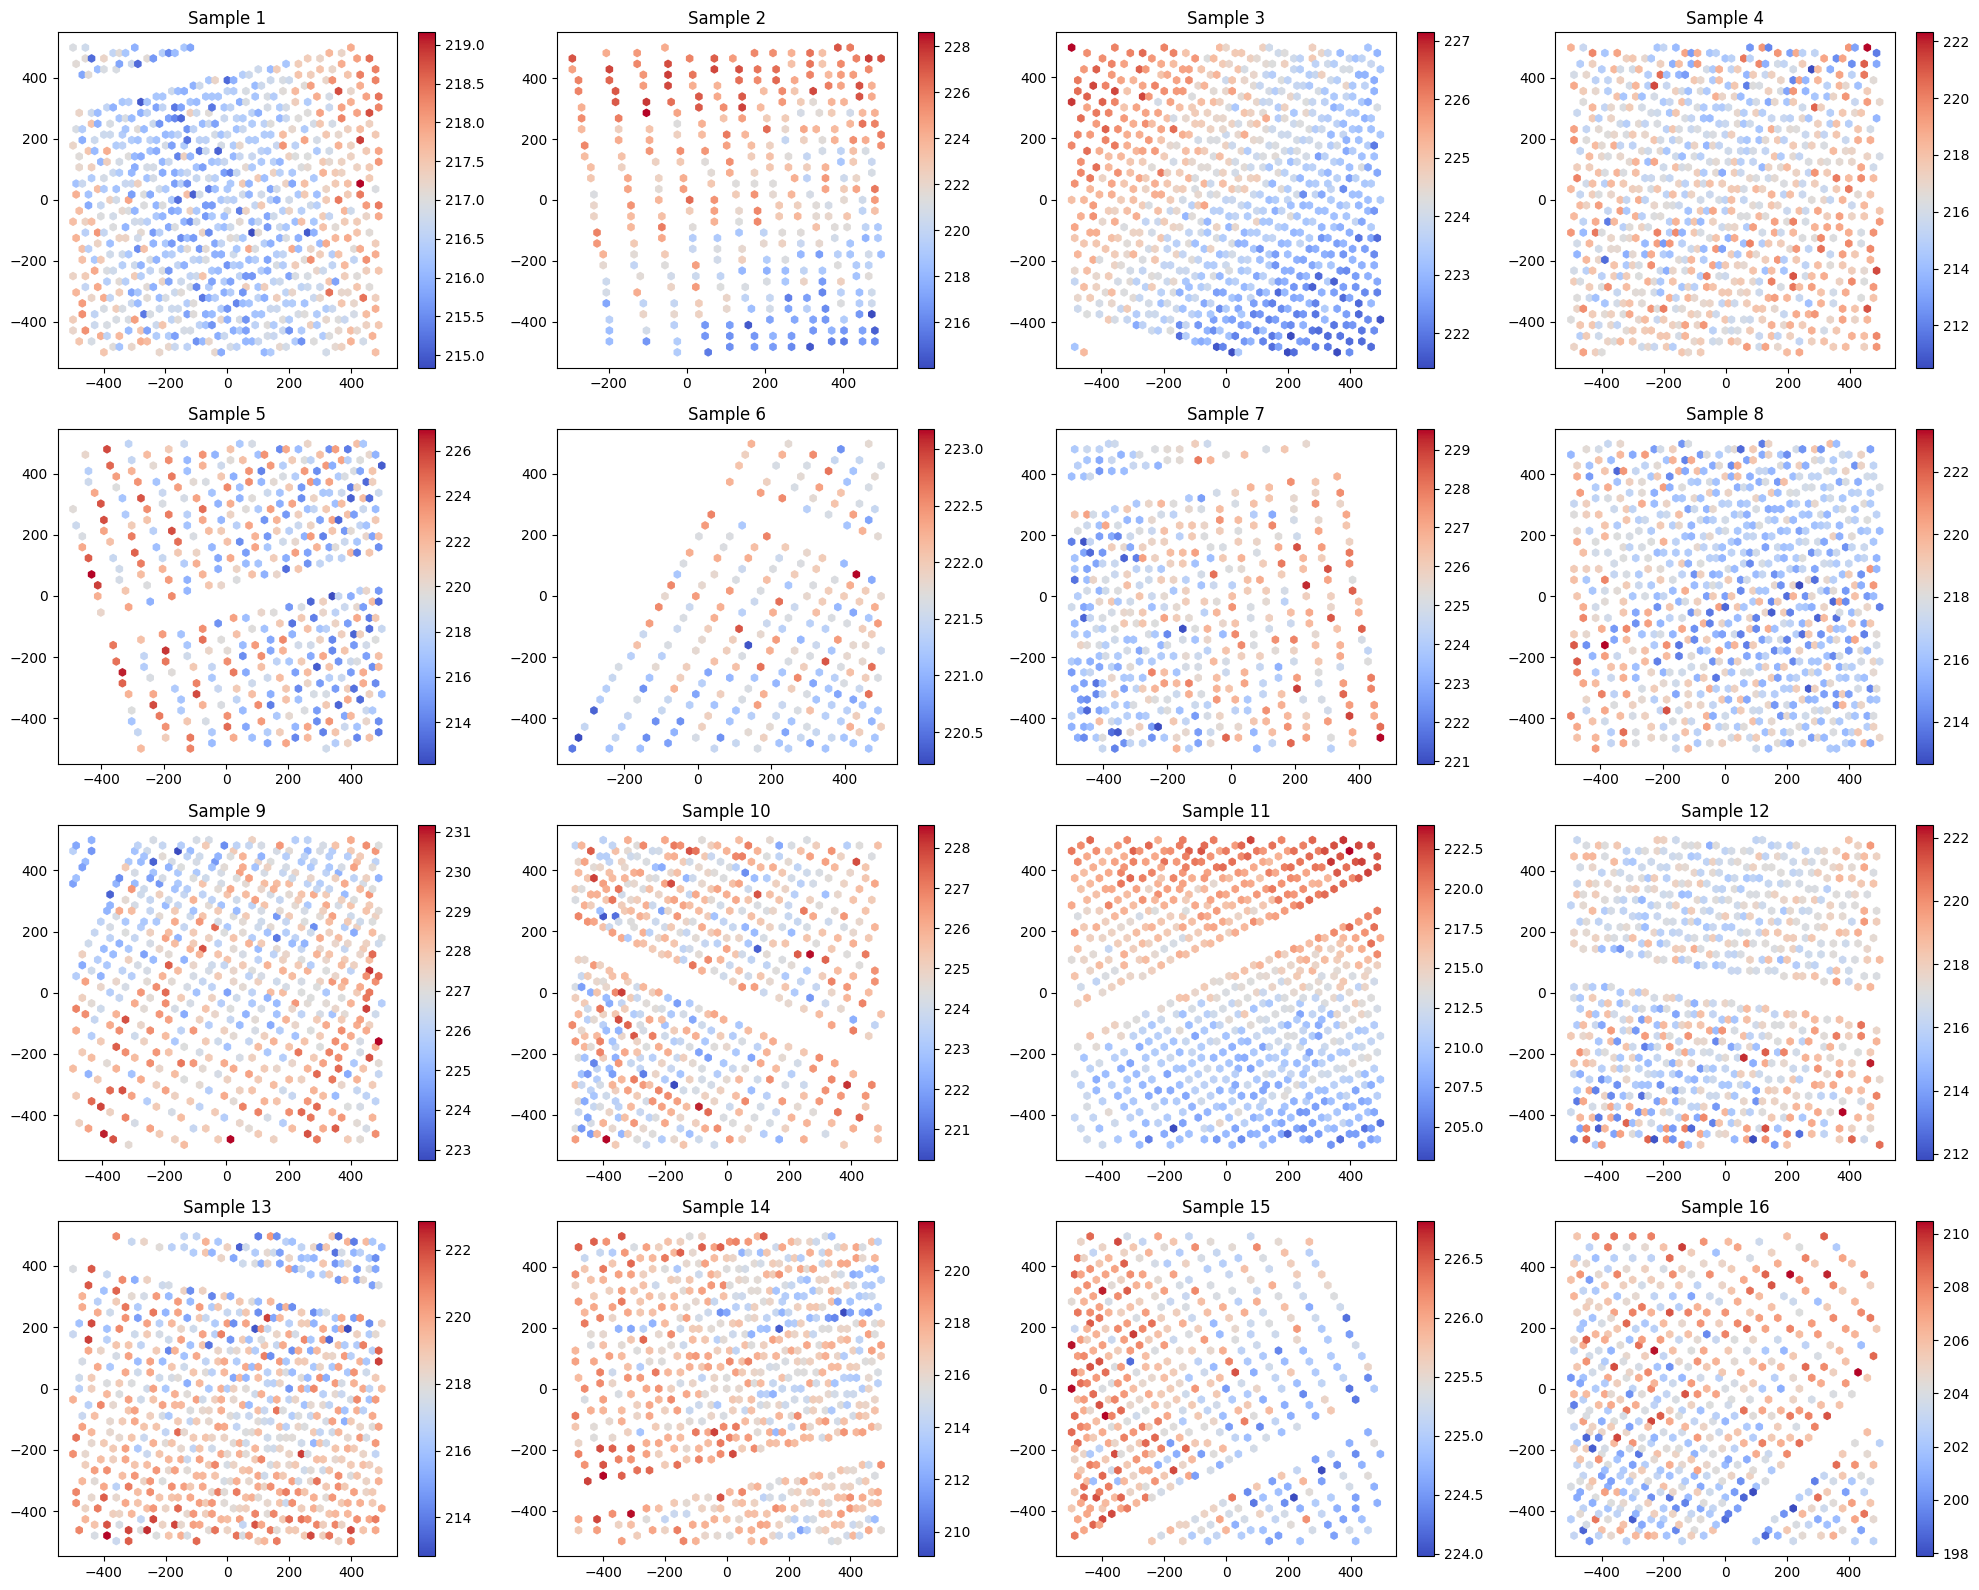

In [6]:
import matplotlib.pyplot as plt
# Plotting code
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(16):
    x, y, time, wind = regional_dset[i]
    coor = i // 4, i % 4
    hb = ax[coor].hexbin(x, y, C=wind, gridsize=50, cmap='coolwarm')
    cb = plt.colorbar(hb, ax=ax[coor])
    ax[coor].set_title(f"Sample {i+1}")

plt.tight_layout()
plt.show()